In [3]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the pre-defined English model:
nlp = spacy.load("en_core_web_lg")

In [3]:
# Process a text
bananas_doc = nlp("bananas")

In [4]:
# Get the vector for the document
bananas_vector = bananas_doc.vector
print(bananas_vector[:10])

[-0.22009  -0.030322 -0.079859 -0.46279  -0.386     0.36962  -0.77178
 -0.11529   0.033601  0.56573 ]


In [5]:
# How long is that vector?
len(bananas_vector)

300

In [6]:
# Try another text. 
# For the 'en_core_web_sm' library it's always 96.
# For the 'en_core_web_lg' library it's always 300.
elephants_doc = nlp("elephants")
elephants_vector = elephants_doc.vector
len(elephants_vector)

300

In [7]:
# One more.
apples_doc = nlp("apples")
apples_vector = apples_doc.vector
len(apples_vector)

300

In [8]:
# How similar are bananas and elephants?
bananas_elephants = bananas_doc.similarity(elephants_doc)
print(bananas_elephants)

0.3361130521078903


In [9]:
# How similar are elephants and apples?
elephants_apples = elephants_doc.similarity(apples_doc)
print(elephants_apples)

0.2557523718801148


In [10]:
# How similar are bananas and apples?
bananas_apples = bananas_doc.similarity(apples_doc)
print(bananas_apples)

0.7502697596349158


In [11]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

In [12]:
# converts a list of words into their word vectors
def get_word_vectors(words):    
    return [nlp(word).vector for word in words]

In [26]:
# our list of 10 words
words = ['car', 'truck', 'suv', 'elves', 'dragon', 'sword', 'king', 'queen', 'prince',  'potato']

In [27]:
# create a 10x300 dataframe
dim_300=get_word_vectors(words)
len(dim_300)

10

In [28]:
# each row has 300 columns
len(dim_300[0])

300

In [29]:
# check that out as a dataframe
df_300=pd.DataFrame(dim_300, index=words)
df_300.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
car,0.209870,0.46481,-0.242380,-0.065751,0.60856,-0.346980,-0.25331,-0.42590,-0.222770,2.2913,...,-1.19240,-0.463950,0.669840,-0.49404,0.441540,-0.43699,0.235380,0.321350,0.266490,0.224380
truck,0.219160,0.33113,0.068603,-0.158140,0.47723,0.280000,-0.40688,-0.37803,-0.093286,1.9458,...,-0.64227,-0.906760,0.869490,-0.28303,-0.084425,-0.89242,0.129450,0.275580,0.073594,-0.029304
suv,-0.068504,0.42310,0.329890,-0.419290,0.51394,0.097215,0.11566,-0.10200,-0.194500,-0.3830,...,-0.52782,-0.576770,-0.043894,-1.07040,0.207500,-0.72830,-0.131050,0.030543,0.349170,-0.418070
elves,-0.526580,-0.63112,-0.962200,-0.232330,-0.38139,-0.024054,0.32924,0.31445,-0.587620,1.0160,...,-0.57048,0.398160,0.296440,0.44622,-0.376030,0.40369,0.048205,0.129960,0.003736,-0.199620
dragon,-0.329310,-0.51365,-0.285020,-0.194470,-0.10735,0.105630,0.14797,0.27913,0.069221,0.7256,...,-0.36388,-0.069899,-0.343330,0.18140,0.082393,0.85123,-0.086035,0.795440,0.700320,-0.161140


### Apply PCA

In [30]:
# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

In [35]:
# fit the pca model to our 300-dimensional data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(df_300)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(df_300)
len(word_vecs_2d)

10

In [42]:
# let's look at our first word and its new 2D word vectors
print(words[0])
word_vecs_2d[0]

car


array([4.93139721, 0.24494976])

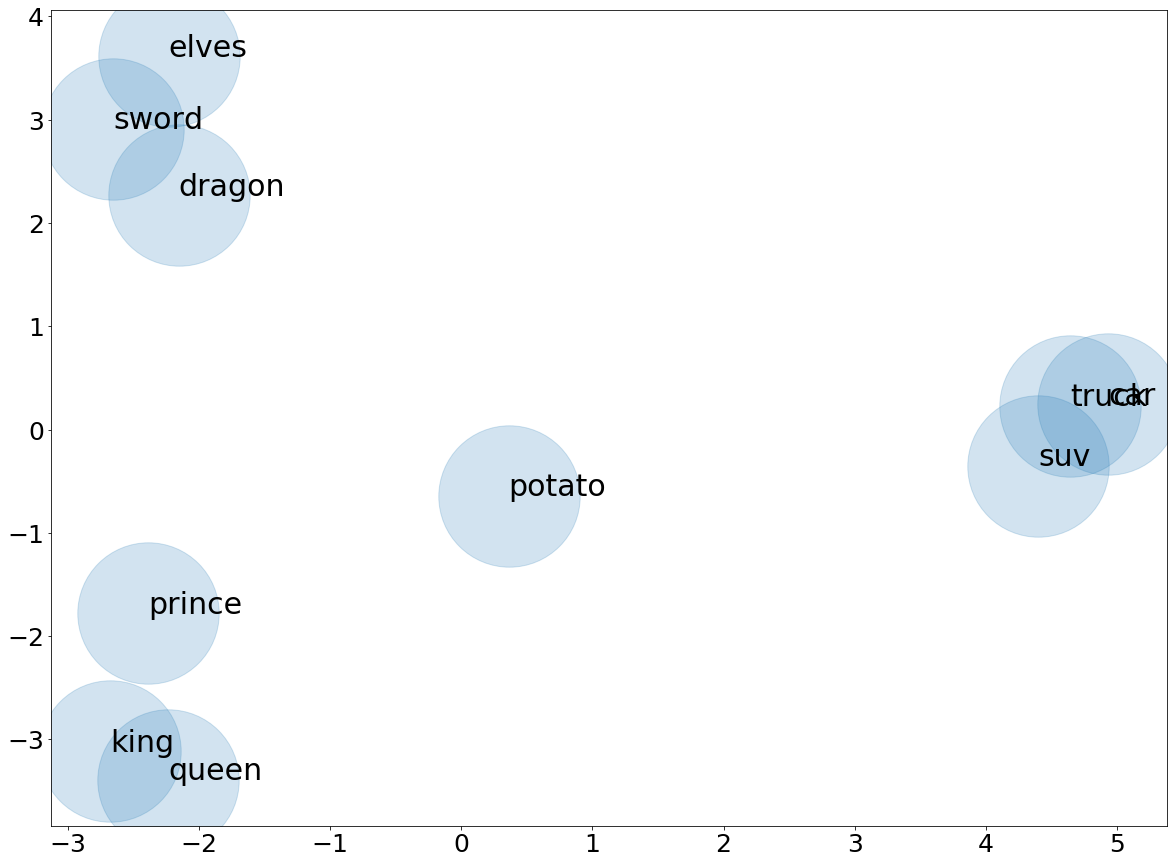

In [43]:
# create a nice big plot 
plt.figure(figsize=(20,15))
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1], s=20000, alpha=.2)

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size=30)

# show the plot
plt.show()

In [44]:
# Save the 10x300 dataframe for later use
df_300.to_pickle('words300df.pkl')

In [5]:
# words
words=pd.read_pickle('words300df.pkl')
words.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
car,0.209870,0.46481,-0.242380,-0.065751,0.60856,-0.346980,-0.25331,-0.42590,-0.222770,2.2913,...,-1.19240,-0.463950,0.669840,-0.49404,0.441540,-0.43699,0.235380,0.321350,0.266490,0.224380
truck,0.219160,0.33113,0.068603,-0.158140,0.47723,0.280000,-0.40688,-0.37803,-0.093286,1.9458,...,-0.64227,-0.906760,0.869490,-0.28303,-0.084425,-0.89242,0.129450,0.275580,0.073594,-0.029304
suv,-0.068504,0.42310,0.329890,-0.419290,0.51394,0.097215,0.11566,-0.10200,-0.194500,-0.3830,...,-0.52782,-0.576770,-0.043894,-1.07040,0.207500,-0.72830,-0.131050,0.030543,0.349170,-0.418070
elves,-0.526580,-0.63112,-0.962200,-0.232330,-0.38139,-0.024054,0.32924,0.31445,-0.587620,1.0160,...,-0.57048,0.398160,0.296440,0.44622,-0.376030,0.40369,0.048205,0.129960,0.003736,-0.199620
dragon,-0.329310,-0.51365,-0.285020,-0.194470,-0.10735,0.105630,0.14797,0.27913,0.069221,0.7256,...,-0.36388,-0.069899,-0.343330,0.18140,0.082393,0.85123,-0.086035,0.795440,0.700320,-0.161140


In [7]:
words.to_csv('words300df.csv', index=False)